"Importing the DATA SETS"


There are multiple datasets to work with, so import all of them at once and store them in a set or dictionary. Whenever the set is needed, just call it by the key, which is the file name, like dfs['train'] or dfs['holidays_events'].



In [2]:
import pandas as pd
import os
import warnings
warnings.simplefilter("ignore")

path = 'C:/Users/jalli/Desktop/wiseanalytics/store_forecasting_data'

files = [i for i in os.listdir(path) if i.endswith('.csv')]

dfs = {}

for file in files:
     file_path = os.path.join(path,file)
     df_name = os.path.splitext(file)[0]
     dfs[df_name] = pd.read_csv(file_path)

for name,df in dfs.items():
    print(f"\nData set name : {name}")
    print(df)




Data set name : holidays_events
           date        type    locale locale_name  \
0    2012-03-02     Holiday     Local       Manta   
1    2012-04-01     Holiday  Regional    Cotopaxi   
2    2012-04-12     Holiday     Local      Cuenca   
3    2012-04-14     Holiday     Local    Libertad   
4    2012-04-21     Holiday     Local    Riobamba   
..          ...         ...       ...         ...   
345  2017-12-22  Additional  National     Ecuador   
346  2017-12-23  Additional  National     Ecuador   
347  2017-12-24  Additional  National     Ecuador   
348  2017-12-25     Holiday  National     Ecuador   
349  2017-12-26  Additional  National     Ecuador   

                       description  transferred  
0               Fundacion de Manta        False  
1    Provincializacion de Cotopaxi        False  
2              Fundacion de Cuenca        False  
3        Cantonizacion de Libertad        False  
4        Cantonizacion de Riobamba        False  
..                            

There are different data set They are :
1) holidays_events
2) oil
3) sample_submission
4) stores
5) test
6) train
7) transactions

In [4]:
train = dfs.get("train")
test = dfs.get("test")
stores = dfs.get("stores")
oil = dfs.get("oil")
holidays_events = dfs.get("holidays_events")

# Merge with 'stores' on 'store_nbr'
train = train.merge(stores, on="store_nbr", how="left")
test = test.merge(stores, on="store_nbr", how="left")
dfs['train']=train
dfs['test']=test
print(dfs['train'])
print(dfs['test'])

              id        date  store_nbr                      family     sales  \
0              0  2013-01-01          1                  AUTOMOTIVE     0.000   
1              1  2013-01-01          1                   BABY CARE     0.000   
2              2  2013-01-01          1                      BEAUTY     0.000   
3              3  2013-01-01          1                   BEVERAGES     0.000   
4              4  2013-01-01          1                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887  2017-08-15          9                     SEAFOOD    16.000   

         onpromotion   city

In [5]:

for name,df in dfs.items():
    print(f"\nData set name : {name}")

    print(df.info())

    print(f"Rows :{df.shape[0]}, columns: {df.shape[1]}")

    print("Descripitive Statistics:")
    print(df.describe())

    print("Missing Values")
    print(df.isnull().sum())

    duplicate_count = df.duplicated().sum()
    print(f"\n Duplicates {duplicate_count} found")




Data set name : holidays_events
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
None
Rows :350, columns: 6
Descripitive Statistics:
              date     type    locale locale_name description transferred
count          350      350       350         350         350         350
unique         312        6         3          24         103           2
top     2014-06-25  Holiday  National     Ecuador    Carnaval       False
freq             4      221       174         174          10         338
Missing Values
date           0
type           0
locale        

                                               Converting date filed or column to Datetime column

In [9]:
# datasets = dfs[['holidays_events', 'oil', 'test', 'train', 'transactions']]
for name,df in dfs.items():
    datasets = ['holidays_events', 'oil', 'test', 'train', 'transactions']
    if name in datasets:
        df['date'] = pd.to_datetime(df['date'])



                                                            Time-based Features:

NameError: name 'plt' is not defined

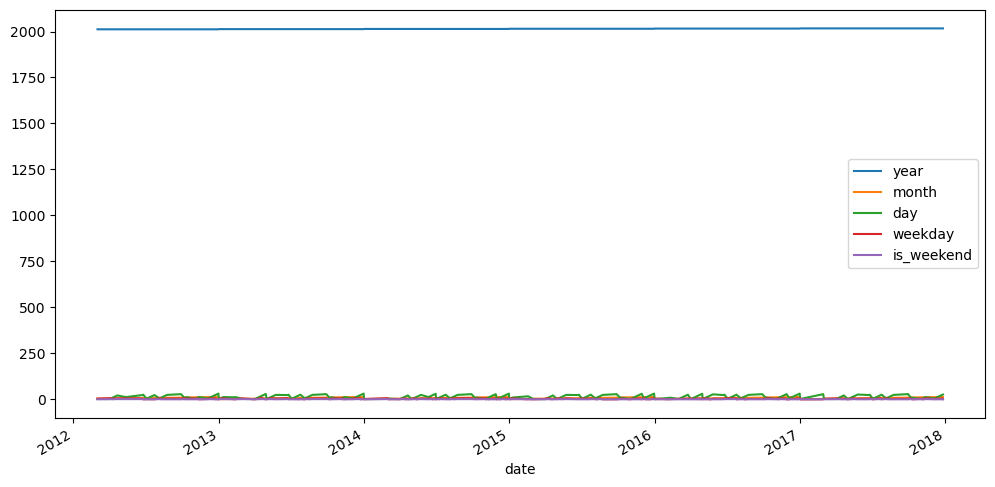

In [11]:
for name,df in dfs.items():
    datasets = ['holidays_events', 'oil', 'test', 'train', 'transactions']
    if name in datasets:
        df['year'] = df['date'].dt.year
        df['month'] = df['date'].dt.month
        df['day'] = df['date'].dt.day
        df['weekday'] = df['date'].dt.weekday  # Monday = 0, Sunday = 6
        df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)
for name,df in dfs.items():
    if 'date' in df.columns and df.select_dtypes(include=['number']).shape[1] > 0:
        df.set_index('date').plot(figsize=(12, 6))
        plt.title(f"Time Series Plot for {name}")
        plt.show()




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Transactions per month (using transactions dataset)
transactions = dfs["transactions"]
transactions["date"] = pd.to_datetime(transactions["date"])
transactions["month"] = transactions["date"].dt.month

sns.barplot(x=transactions.groupby("month")["transactions"].sum().index, 
            y=transactions.groupby("month")["transactions"].sum().values, 
            ax=axes[0], palette="viridis")
axes[0].set_title("Total Transactions Per Month")
axes[0].set_ylabel("Total Transactions")

# Oil Prices per month

oil = dfs["oil"]
oil["date"] = pd.to_datetime(oil["date"])
oil["month"] = oil["date"].dt.month

sns.lineplot(x=oil.groupby("month")["dcoilwtico"].mean().index, 
             y=oil.groupby("month")["dcoilwtico"].mean().values, 
             ax=axes[1], color="red", marker="o")
axes[1].set_title("Average Oil Price Per Month")
axes[1].set_ylabel("Oil Price (USD)")

# Holidays per month
holidays = dfs["holidays_events"]
holidays["date"] = pd.to_datetime(holidays["date"])
holidays["month"] = holidays["date"].dt.month

sns.barplot(x=holidays.groupby("month")["type"].count().index, 
            y=holidays.groupby("month")["type"].count().values, 
            ax=axes[2], palette="coolwarm")
axes[2].set_title("Number of Holidays Per Month")
axes[2].set_ylabel("Count of Holidays")

plt.tight_layout()
plt.show()



From the graphical data, we can conclude that in the month of December, or towards the end of the year, oil prices decrease drastically. Additionally, 
the number of holidays is high, and transactions show a positive trend. This suggests that the end of the year is an ideal time for promoting 
travel-related offers, such as discounts on transportation and hotels.

In [249]:
print("Unique States:", dfs['train']['state'].nunique())
print("Unique Cities:", dfs['train']['city'].nunique())
print("Unique Product Families:", dfs['train']['family'].nunique())


Unique States: 16
Unique Cities: 22
Unique Product Families: 33


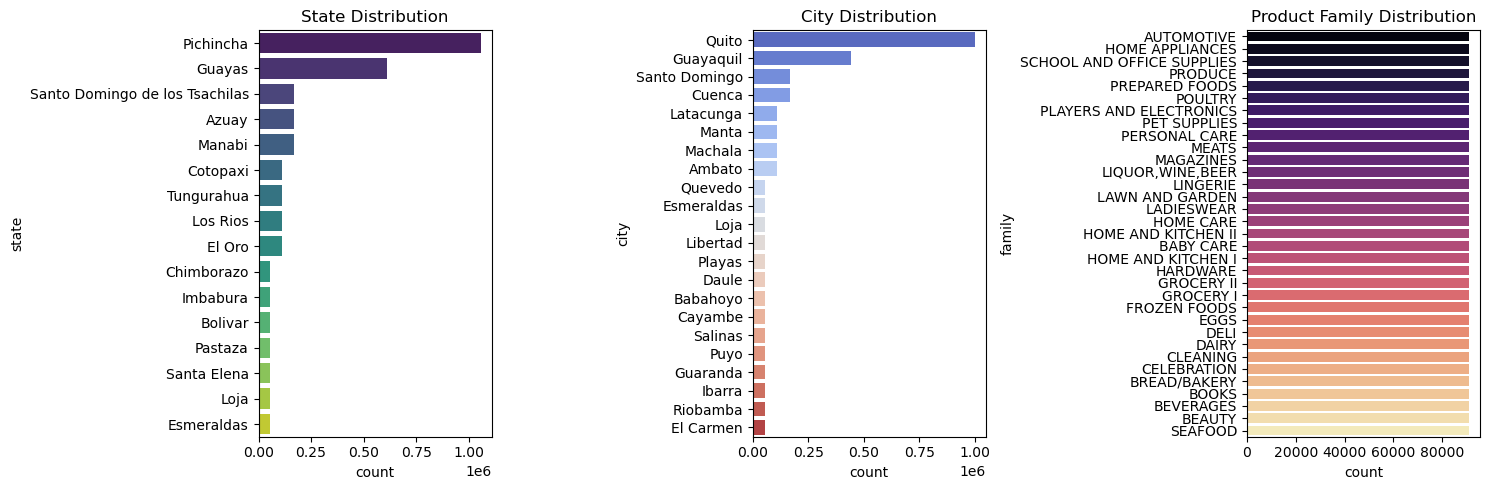

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(15,5))

# State count plot
plt.subplot(1,3,1)
sns.countplot(y=dfs['train']['state'], order=dfs['train']['state'].value_counts().index, palette="viridis")
plt.title("State Distribution")

# City count plot
plt.subplot(1,3,2)
sns.countplot(y=dfs['train']['city'], order=dfs['train']['city'].value_counts().index, palette="coolwarm")
plt.title("City Distribution")

# Product Family count plot
plt.subplot(1,3,3)
sns.countplot(y=dfs['train']['family'], order=dfs['train']['family'].value_counts().index, palette="magma")
plt.title("Product Family Distribution")

plt.tight_layout()
plt.show()


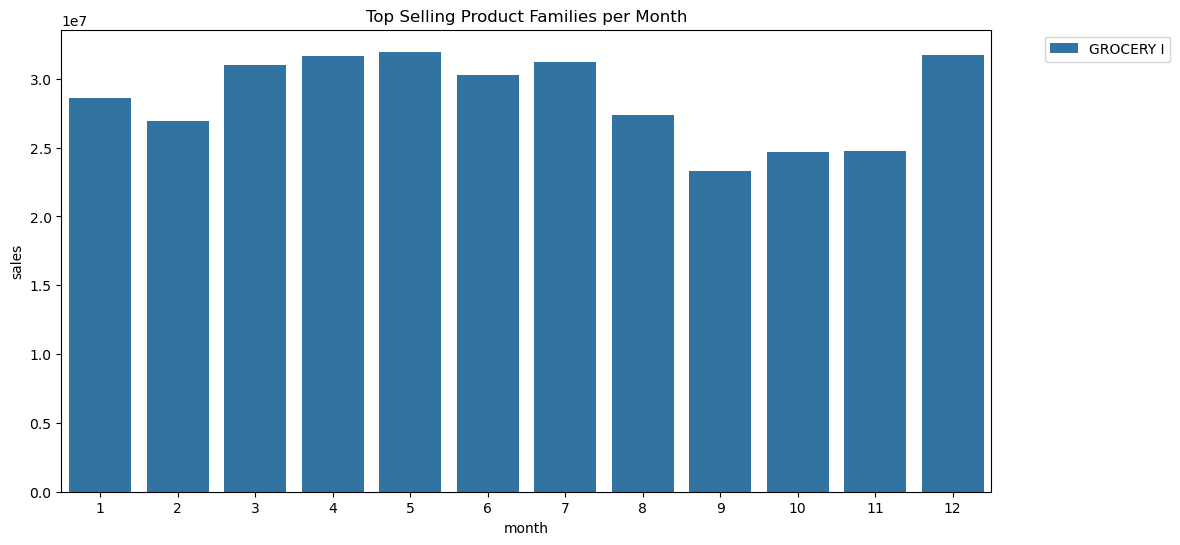

In [252]:
monthly_sales = dfs['train'].groupby(['family', 'month'])['sales'].sum().reset_index()

# Get top family per month
top_families = monthly_sales.loc[monthly_sales.groupby("month")['sales'].idxmax()]

plt.figure(figsize=(12,6))
sns.barplot(x="month", y="sales", hue="family", data=top_families, palette="tab10")
plt.title("Top Selling Product Families per Month")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




                                                                Data Cleaning



handiling null value 

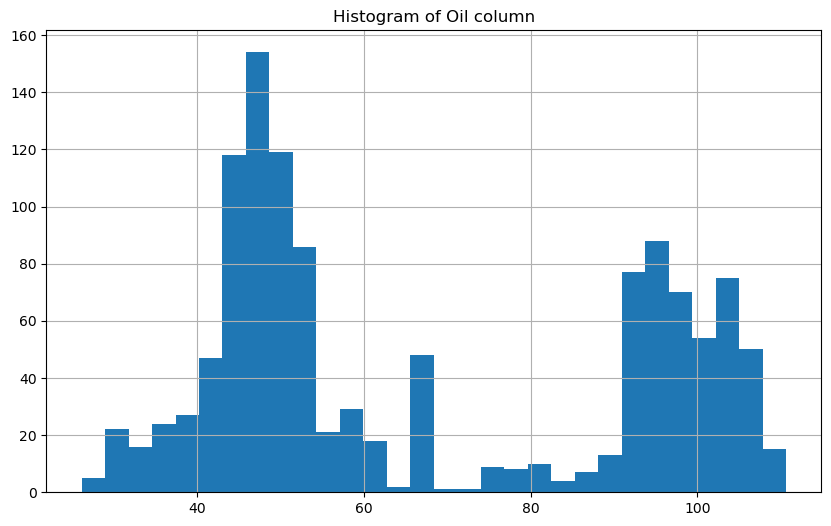

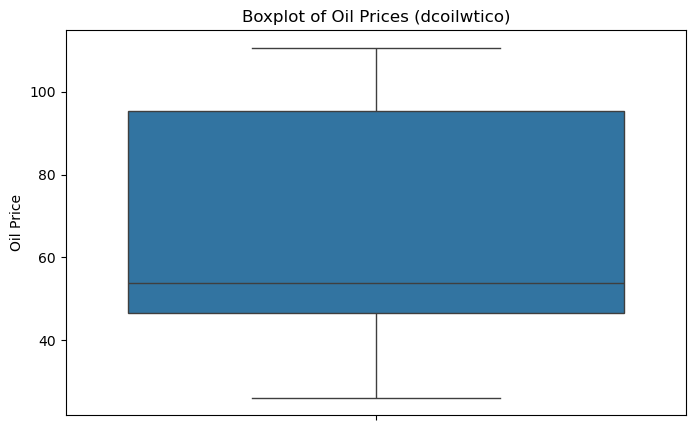

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram
plt.title("Histogram of Oil column")
dfs['oil']['dcoilwtico'].hist(figsize=(10,6),bins=30)
plt.show()

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=dfs['oil']['dcoilwtico'])
plt.title("Boxplot of Oil Prices (dcoilwtico)")
plt.ylabel("Oil Price")
plt.show()

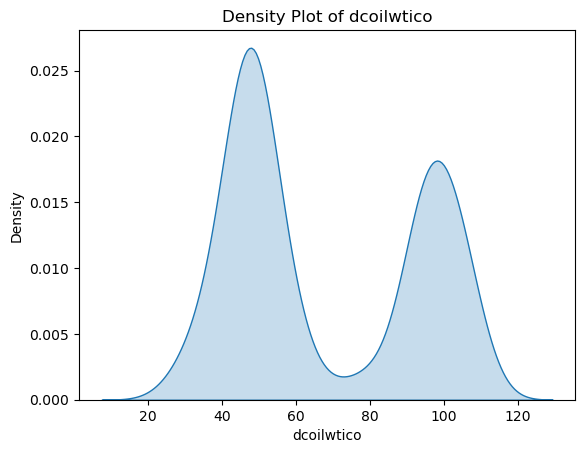

In [258]:
import seaborn as sns

sns.kdeplot(dfs['oil']['dcoilwtico'], shade=True)
plt.title("Density Plot of dcoilwtico")
plt.show()


In [13]:
import pandas as pd
from sklearn.impute import KNNImputer

# Select only the relevant column and reshape it for imputation
data = dfs['oil'][['dcoilwtico']]

# Create KNNImputer instance with 2 nearest neighbors
imputer = KNNImputer(n_neighbors=2)

# Fit and transform the dataset
dfs['oil']['dcoilwtico'] = imputer.fit_transform(data)

print("Missing values after imputation:", dfs['oil']['dcoilwtico'].isnull().sum())


Missing values after imputation: 0




                                                            EDA(Exploratory Data Analysis)




EDA for Data-set holidays_events


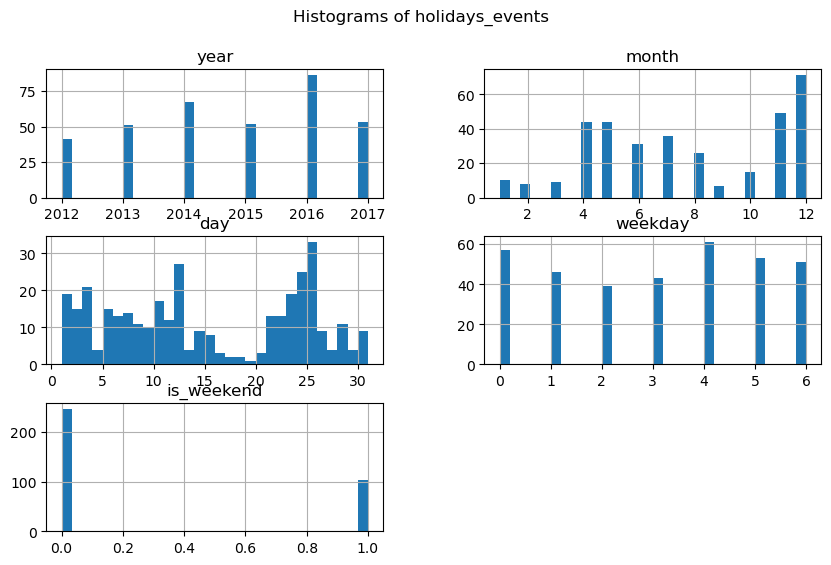

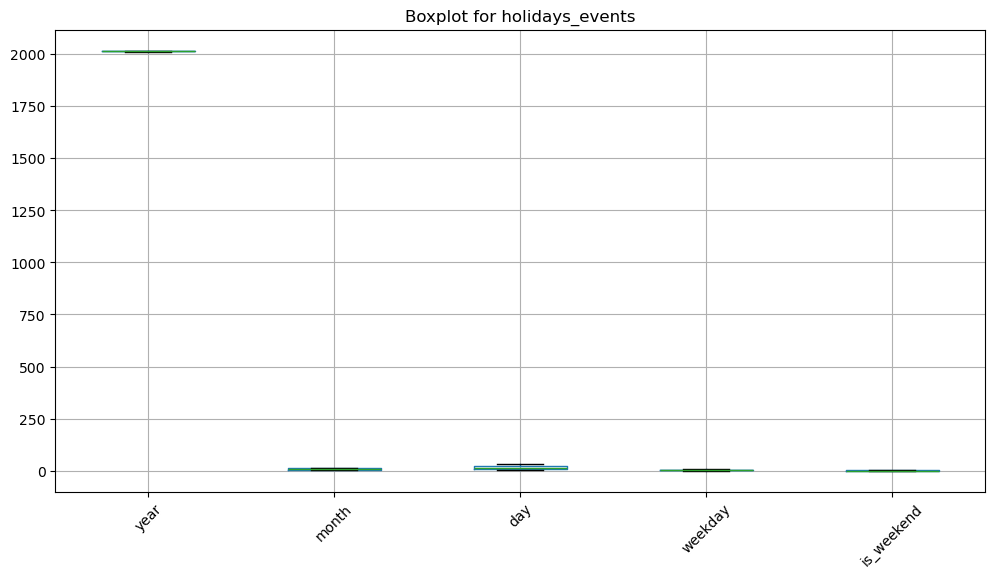

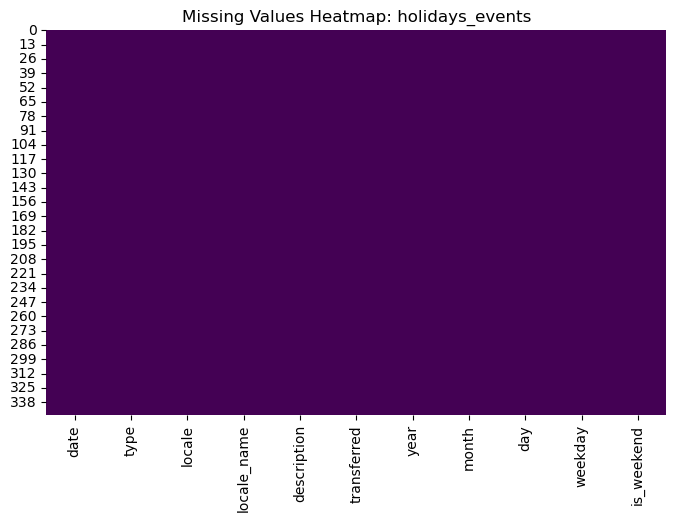

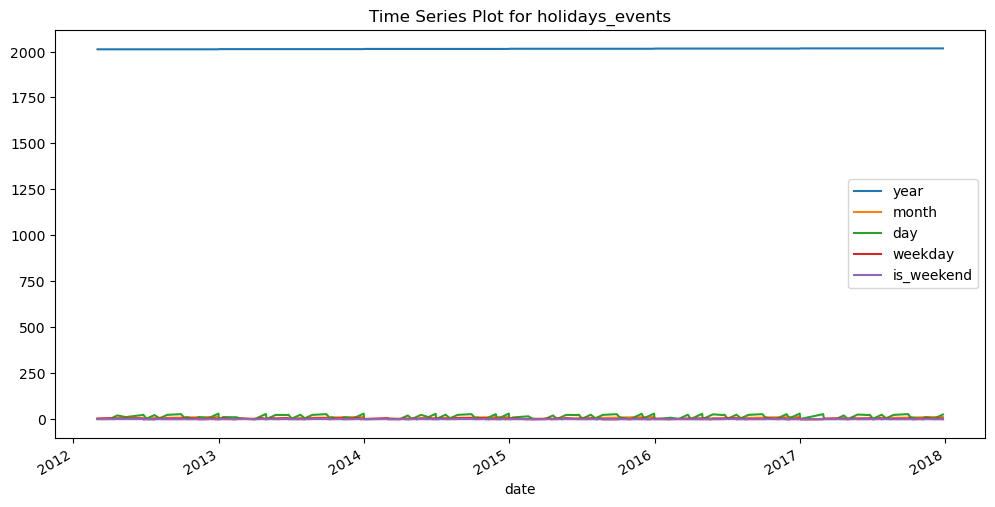

EDA for Data-set oil


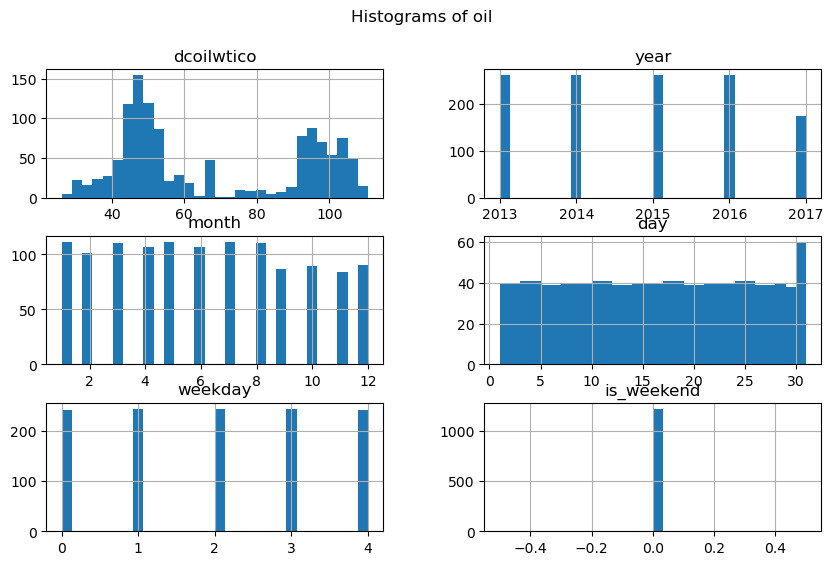

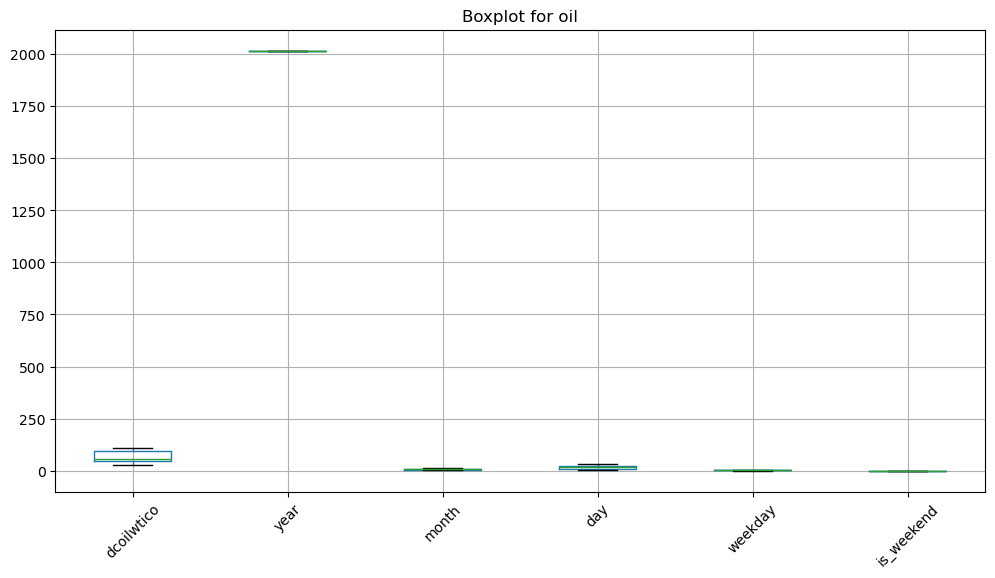

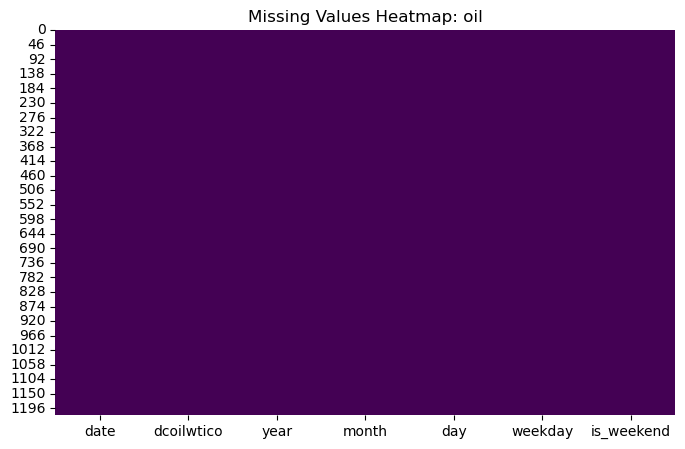

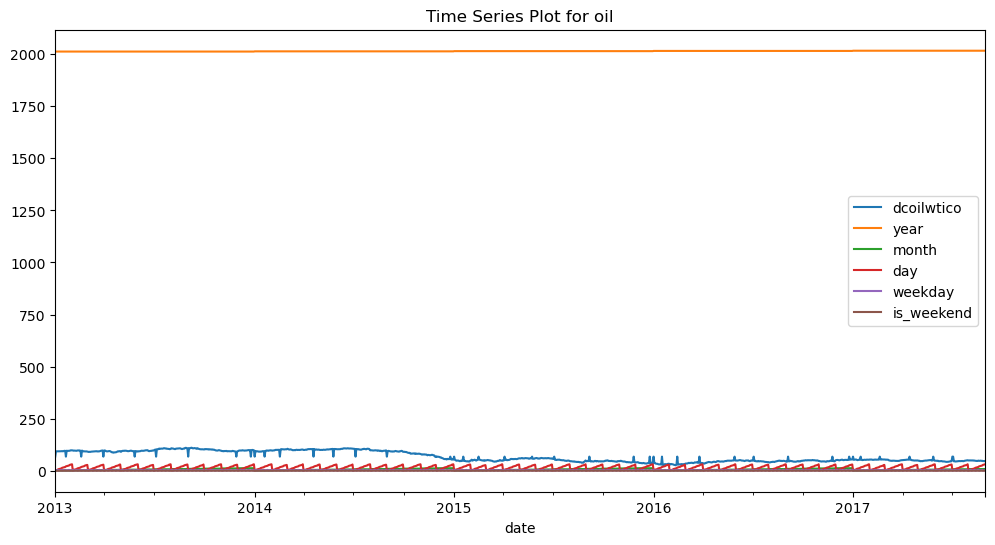

EDA for Data-set sample_submission


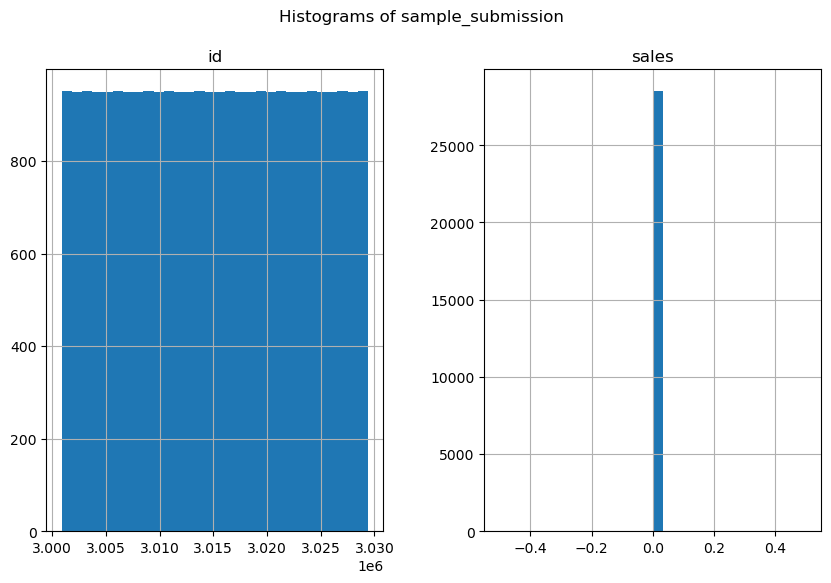

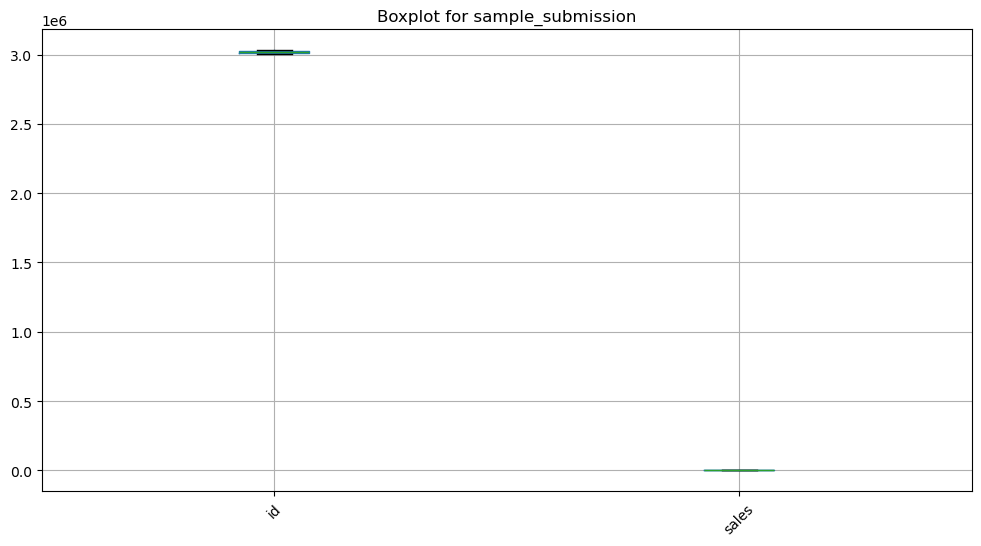

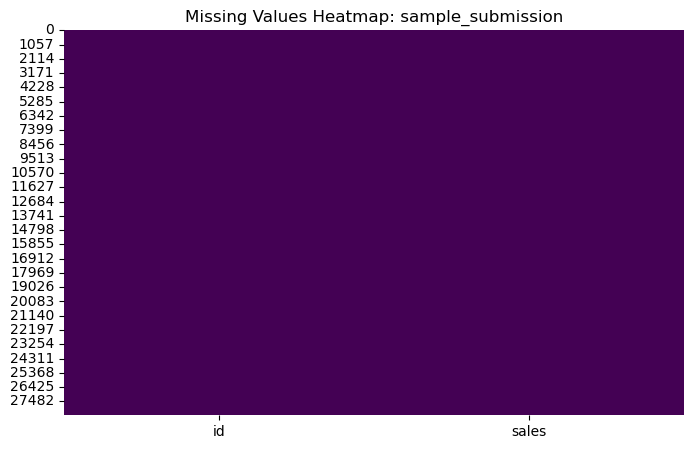

EDA for Data-set stores


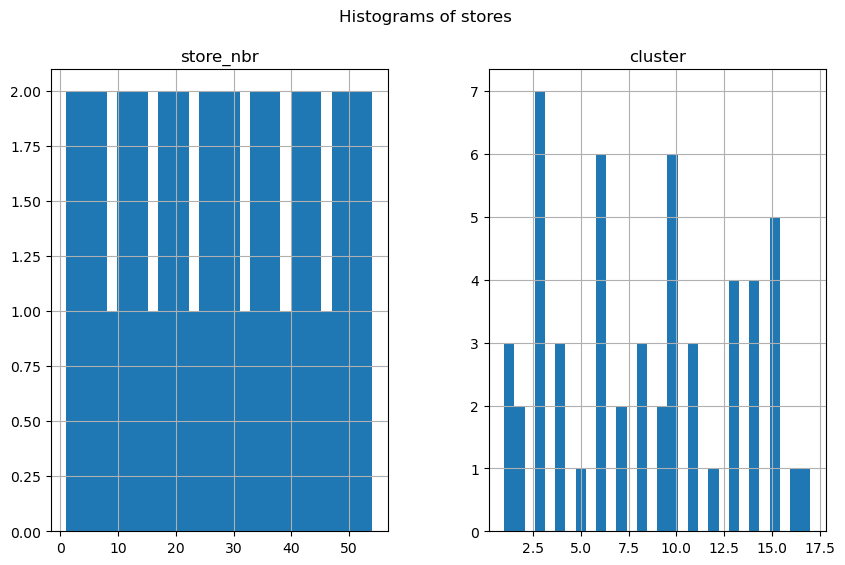

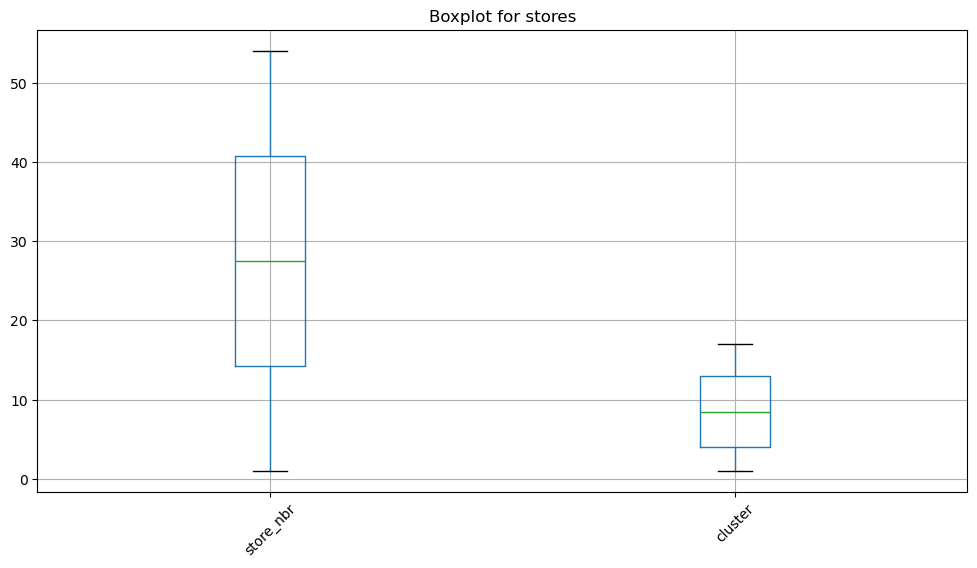

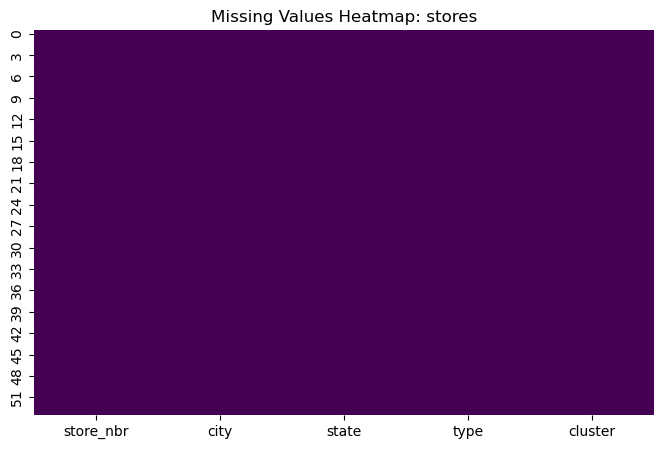

EDA for Data-set test


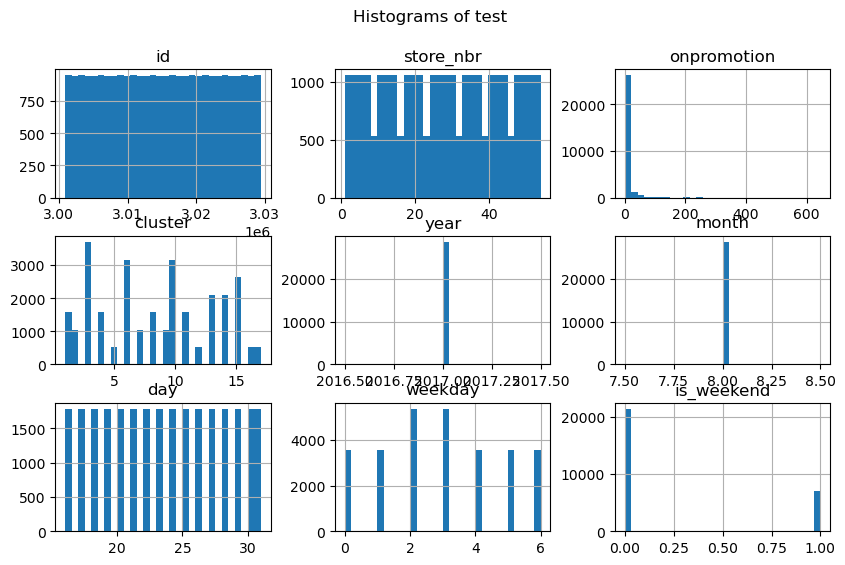

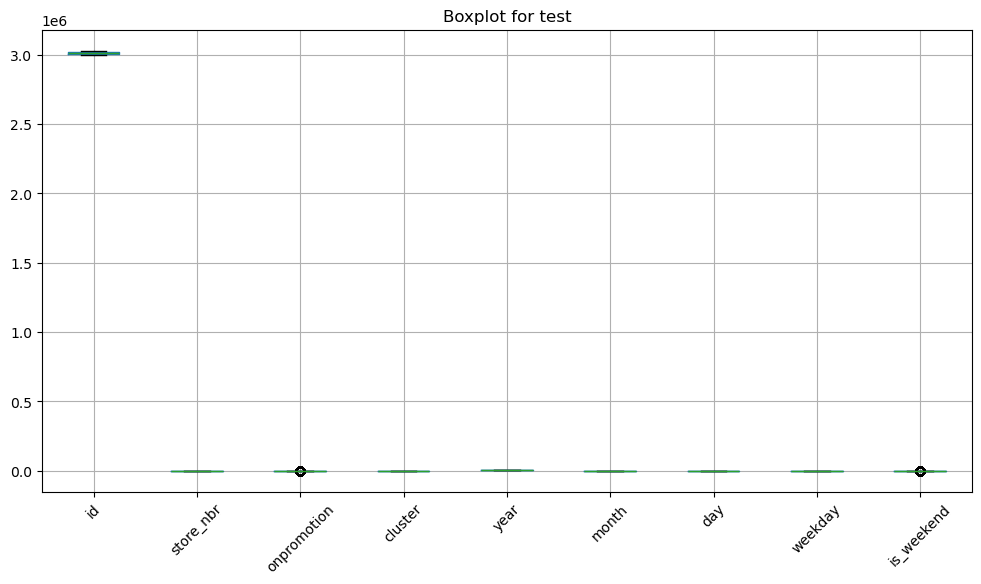

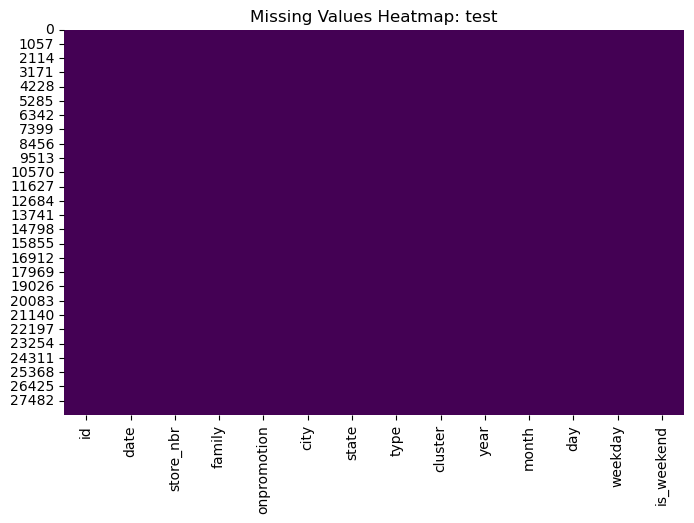

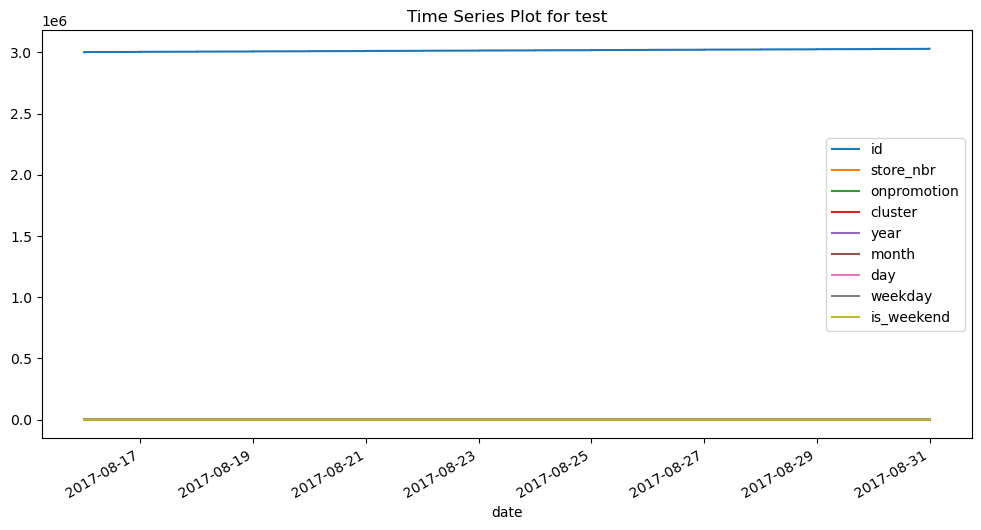

EDA for Data-set train


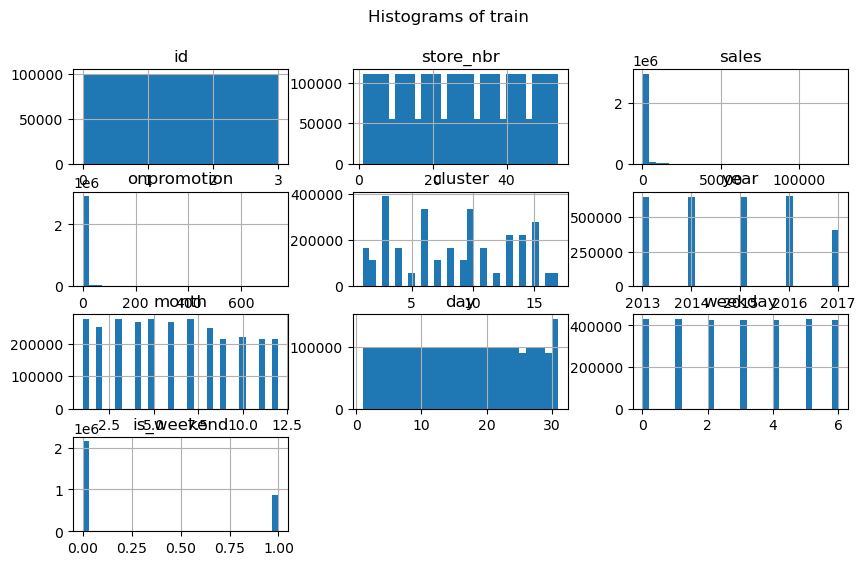

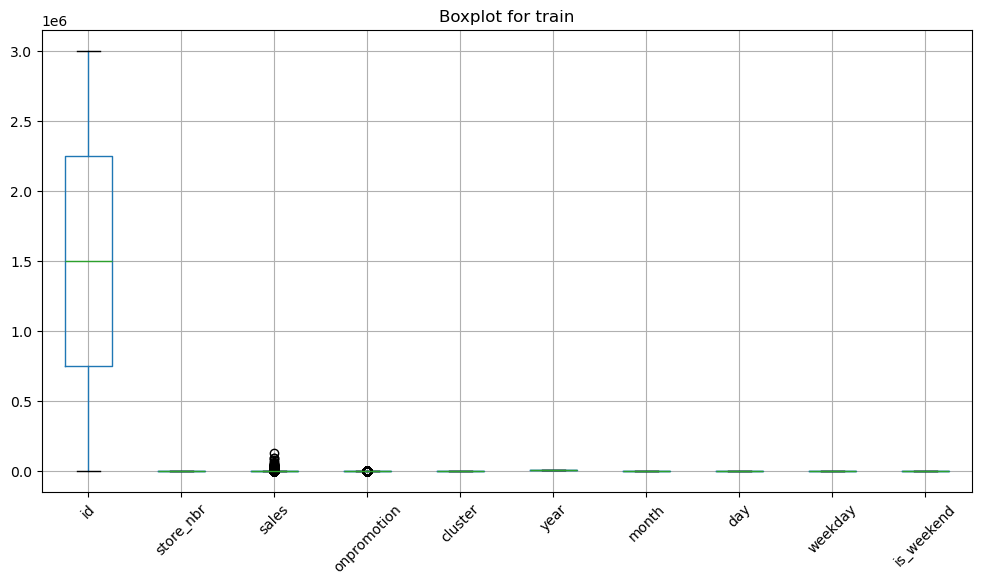

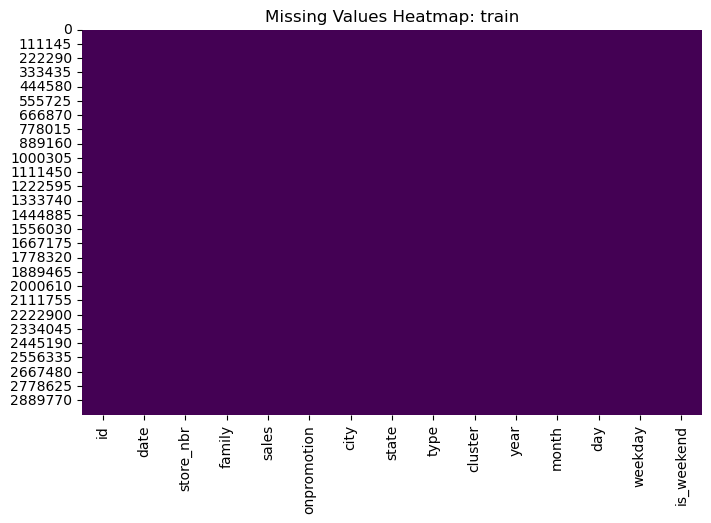

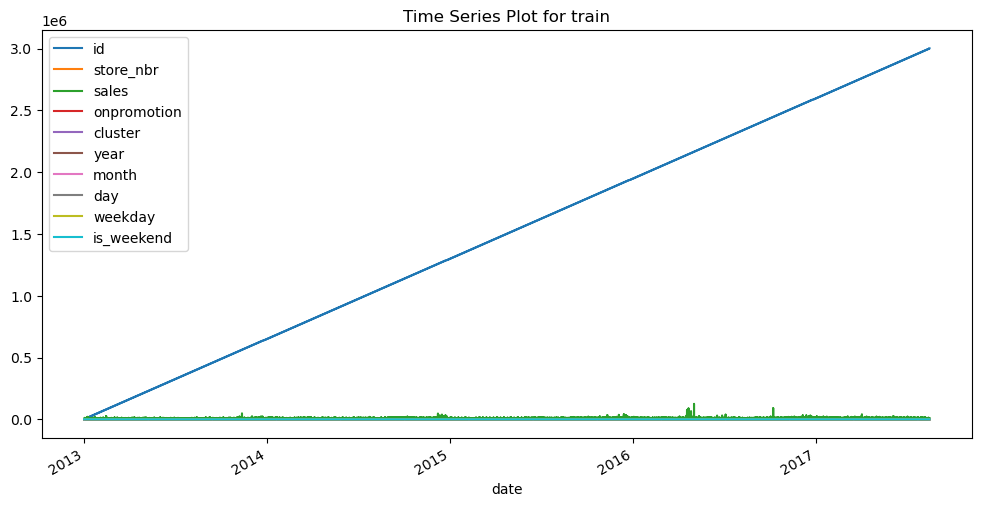

EDA for Data-set transactions


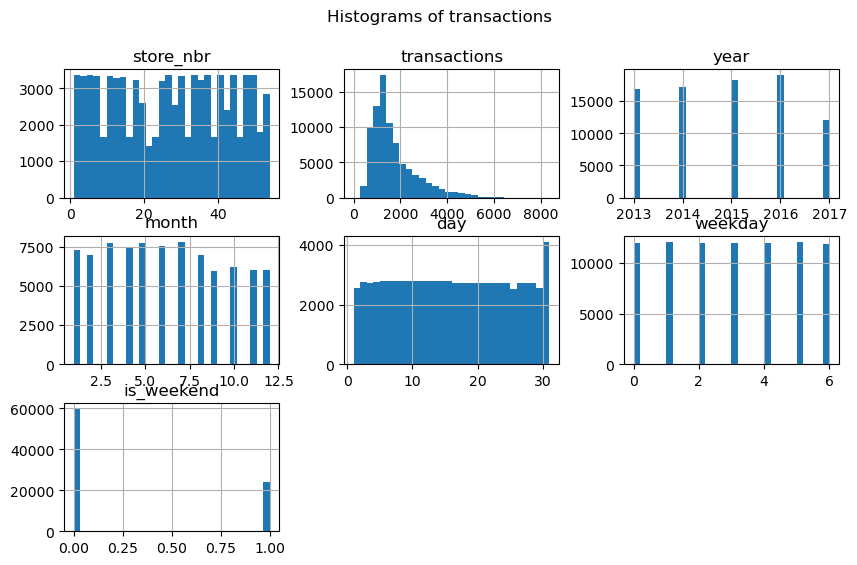

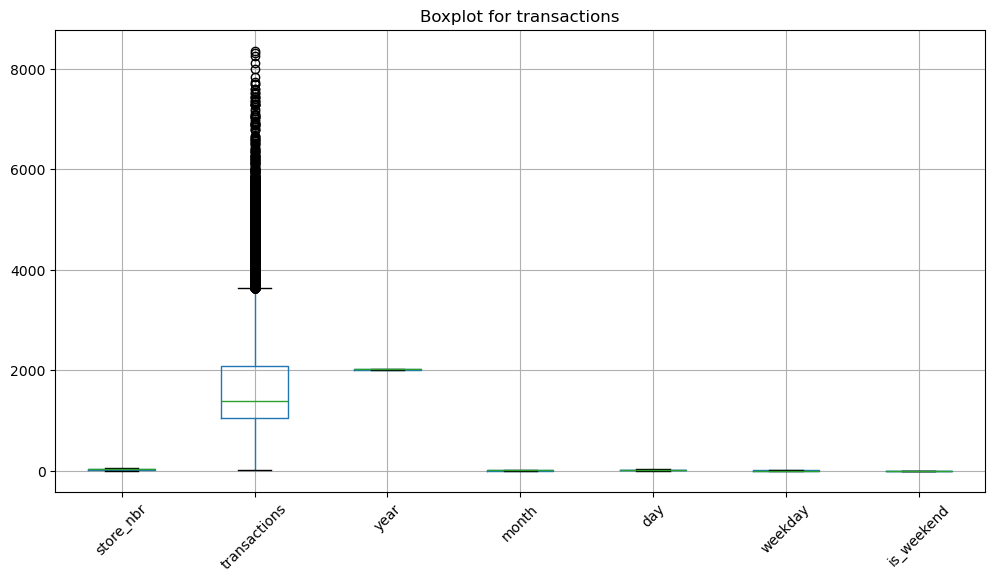

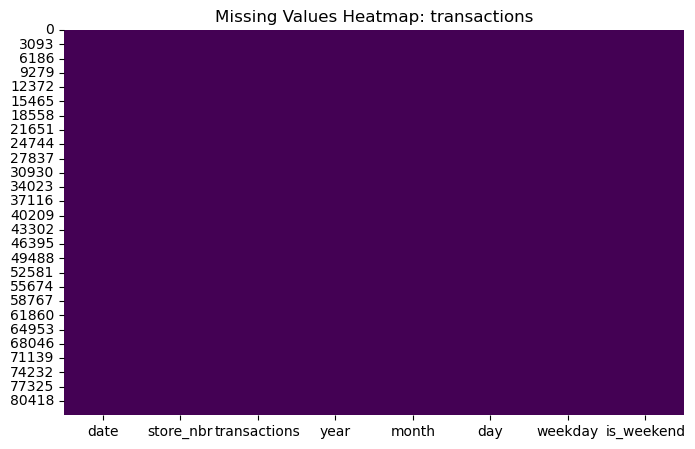

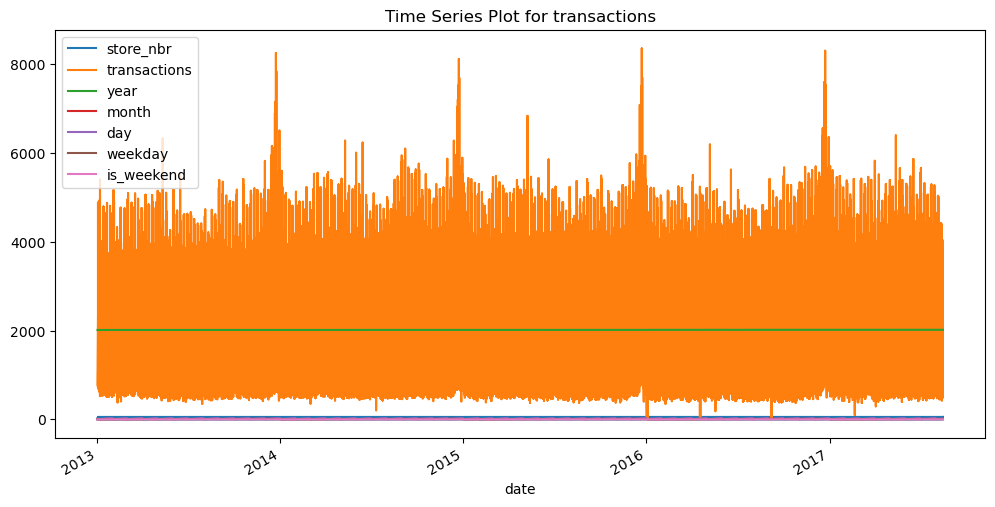

In [261]:


for name,df in dfs.items():
    print(f"EDA for Data-set {name}")

    # histograms
    numeric_cols = df.select_dtypes(include=['number']).columns  # Select only numerical columns
    if not numeric_cols.empty:
        df[numeric_cols].hist(figsize=(10, 6), bins=30)
        plt.suptitle(f"Histograms of {name}")
        plt.show()

        plt.figure(figsize=(12, 6))
        df[numeric_cols].boxplot(rot=45)
        plt.title(f"Boxplot for {name}")
        plt.show()

    # Boxplots to check for outliers
    # plt.figure(figsize=(12, 6))
    # df.select_dtypes(include=['number']).boxplot(rot=45)
    # plt.title(f"Boxplot for {name}")
    # plt.show()

    # Visualize missing values heatmap
    plt.figure(figsize=(8, 5))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title(f"Missing Values Heatmap: {name}")
    plt.show()
    
    # Time Series Plot for Date-based Data (e.g., oil prices, transactions, train set):
    if 'date' in df.columns and df.select_dtypes(include=['number']).shape[1] > 0:
        df.set_index('date').plot(figsize=(12, 6))
        plt.title(f"Time Series Plot for {name}")
        plt.show()


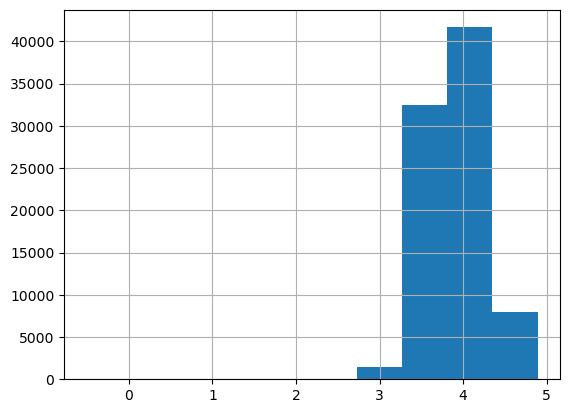

In [21]:
from scipy import stats
dfs['transactions']['transactions'], _ = stats.boxcox(dfs['transactions']['transactions'])
dfs['transactions']['transactions'].hist()
plt.show()





                                                                    Model Traning

In [24]:

from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score

train['sales_lag_1'] = train['sales'].shift(1)  # Naïve forecast (yesterday's sales = today's prediction)
naive_rmse = mean_squared_error(train['sales'][1:], train['sales_lag_1'][1:], squared=False)
print("Naïve Forecast RMSE:", naive_rmse)


Naïve Forecast RMSE: 1577.1812612249428


In [23]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['sales'], order=(5,1,0))  # Adjust order parameters as needed
model_fit = model.fit()
train['arima_forecast'] = model_fit.predict(start=1, end=len(train))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Selecting features and target
features = ['store_nbr', 'family', 'city', 'state', 'type', 'cluster', 'year', 'month', 'day', 'weekday', 'is_weekend']
target = 'sales'

# Encode categorical features
encoded_train = train.copy()
label_encoders = {}

for col in ['family', 'city', 'state', 'type']:  
    le = LabelEncoder()
    encoded_train[col] = le.fit_transform(encoded_train[col])  
    label_encoders[col] = le  # Store encoder for future use

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(encoded_train[features], encoded_train[target], test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

print(rf_preds[:10])


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data in (samples, timesteps, features) format
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32)

lstm_preds = model.predict(X_test_reshaped)


Epoch 1/20
75023/75023 ━━━━━━━━━━━━━━━━━━━━ 518s 7ms/step - loss: 933004.1250
Epoch 2/20
75023/75023 ━━━━━━━━━━━━━━━━━━━━ 509s 7ms/step - loss: 846698.3125
Epoch 3/20
75023/75023 ━━━━━━━━━━━━━━━━━━━━ 489s 7ms/step - loss: 858501.2500
Epoch 4/20
75023/75023 ━━━━━━━━━━━━━━━━━━━━ 461s 6ms/step - loss: 832708.4375
Epoch 5/20
75023/75023 ━━━━━━━━━━━━━━━━━━━━ 467s 6ms/step - loss: 825339.6250
Epoch 6/20
75023/75023 ━━━━━━━━━━━━━━━━━━━━ 480s 6ms/step - loss: 847441.5625
Epoch 7/20
75023/75023 ━━━━━━━━━━━━━━━━━━━━ 478s 6ms/step - loss: 835576.3750
Epoch 8/20
75023/75023 ━━━━━━━━━━━━━━━━━━━━ 481s 6ms/step - loss: 835147.8750
Epoch 9/20
75023/75023 ━━━━━━━━━━━━━━━━━━━━ 516s 7ms/step - loss: 834058.0625
Epoch 10/20
75023/75023 ━━━━━━━━━━━━━━━━━━━━ 361s 5ms/step - loss: 820124.3125
Epoch 11/20
75023/75023 ━━━━━━━━━━━━━━━━━━━━ 606s 8ms/step - loss: 816762.1250
Epoch 12/20
75023/75023 ━━━━━━━━━━━━━━━━━━━━ 556s 7ms/step - loss: 813991.8750
Epoch 13/20
75023/75023 ━━━━━━━━━━━━━━━━━━━━ 467s 6ms/step - 



                                                                    Model Evaluation


In [321]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

print("RF RMSE:", mean_squared_error(y_test, rf_preds, squared=False))
print("XGB RMSE:", mean_squared_error(y_test, xgb_preds, squared=False))
print("LSTM RMSE:", mean_squared_error(y_test, lstm_preds, squared=False))

print("RF MAPE:", mean_absolute_percentage_error(y_test, rf_preds))
print("XGB MAPE:", mean_absolute_percentage_error(y_test, xgb_preds))
print("LSTM MAPE:", mean_absolute_percentage_error(y_test, lstm_preds))

print("RF R²:", r2_score(y_test, rf_preds))
print("XGB R²:", r2_score(y_test, xgb_preds))
print("LSTM R²:", r2_score(y_test, lstm_preds))


RF RMSE: 864.1774518720538
XGB RMSE: 835.1509131743875
LSTM RMSE: 911.7173656691529
RF MAPE: 1.7895140254747242e+17
XGB MAPE: 1.787314780739262e+17
LSTM MAPE: 2.2346797836003594e+17
RF R²: 0.39654487179207165
XGB R²: 0.43640252085292064
LSTM R²: 0.32832439488943044






                                                                    Visualization

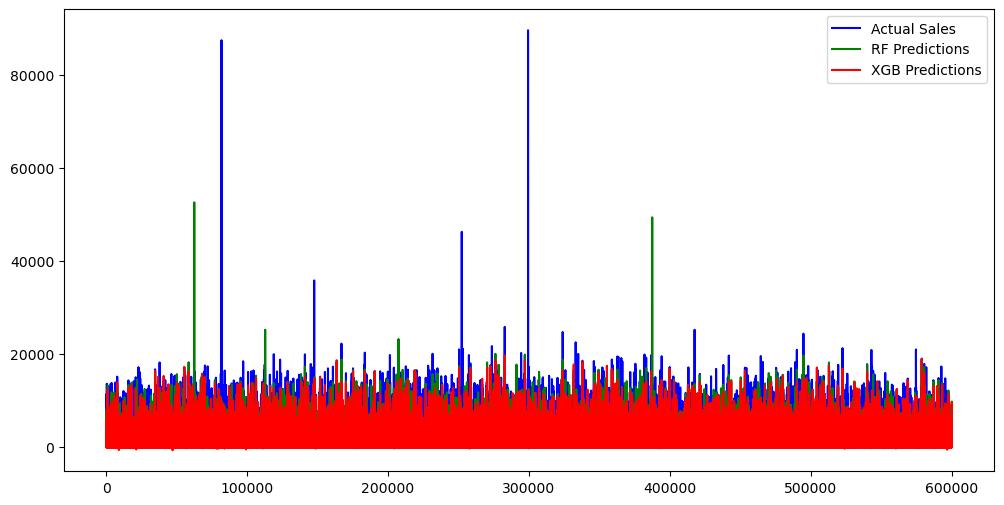

In [323]:

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Sales", color="blue")
plt.plot(rf_preds, label="RF Predictions", color="green")
plt.plot(xgb_preds, label="XGB Predictions", color="red")
plt.legend()
plt.show()
